各地区统计描述和离群值分析:

--- 桥西地区 ---
二手房单价 - 样本数: 1200
  中位数: 5653元/平米
  离群值范围: <866 或 >10658
  离群值数量: 36
租金单价 - 样本数: 816
  中位数: 13.00元/平米/月
  离群值范围: <4.25 或 >22.55
  离群值数量: 51
房价租金比: 434.85

--- 下花园地区 ---
二手房单价 - 样本数: 446
  中位数: 3384元/平米
  离群值范围: <-404 或 >7535
  离群值数量: 8
租金单价 - 样本数: 178
  中位数: 11.85元/平米/月
  离群值范围: <-2.40 或 >26.70
  离群值数量: 3
房价租金比: 285.55

--- 怀来地区 ---
二手房单价 - 样本数: 1200
  中位数: 6502元/平米
  离群值范围: <-3235 或 >17209
  离群值数量: 43
租金单价 - 样本数: 78
  中位数: 15.65元/平米/月
  离群值范围: <1.94 或 >29.31
  离群值数量: 6
房价租金比: 415.45

--- 张北地区 ---
二手房单价 - 样本数: 164
  中位数: 4204元/平米
  离群值范围: <1624 或 >6776
  离群值数量: 1
租金单价 - 样本数: 75
  中位数: 11.63元/平米/月
  离群值范围: <6.80 或 >15.67
  离群值数量: 7
房价租金比: 361.50


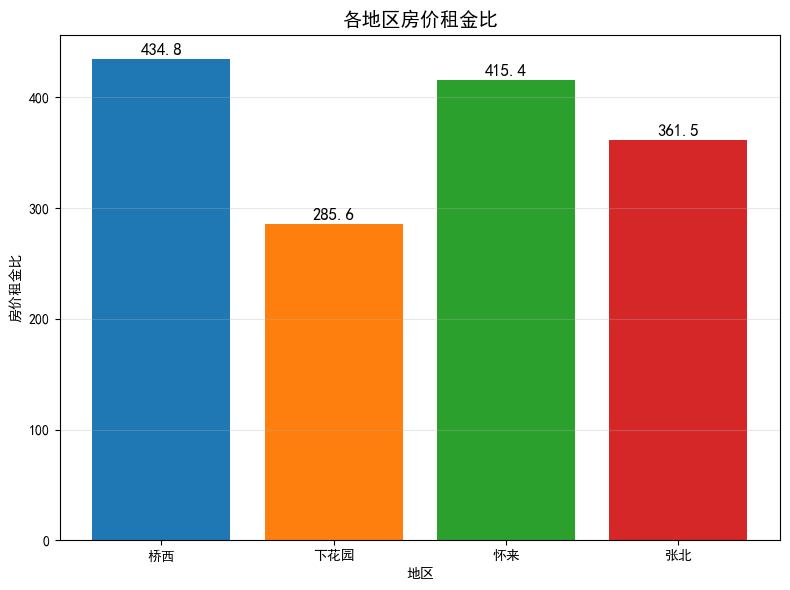

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
esf_data = pd.read_excel('combined_esf_data.xlsx')
zu_data = pd.read_excel('combined_zu_data.xlsx')

# 计算租金单价
zu_data['rent_per_sqm'] = zu_data['租金'] / zu_data['面积']

# 离群值检测函数
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# 按地区分析
regions = ['桥西', '下花园', '怀来','张北']
price_rent_ratios = []

print("各地区统计描述和离群值分析:")
print("=" * 30)

for region in regions:
    print(f"\n--- {region}地区 ---")
    
    # 获取各地区数据
    esf_region = esf_data[esf_data[region] == 1]
    zu_region = zu_data[zu_data[region] == 1]
    
    # 二手房单价统计和离群值
    outliers, lower, upper = detect_outliers(esf_region, '单价')
    print(f"二手房单价 - 样本数: {len(esf_region)}")
    print(f"  中位数: {esf_region['单价'].median():.0f}元/平米")
    print(f"  离群值范围: <{lower:.0f} 或 >{upper:.0f}")
    print(f"  离群值数量: {len(outliers)}")
    
    # 租金单价统计和离群值
    outliers_rent, lower_rent, upper_rent = detect_outliers(zu_region, 'rent_per_sqm')
    print(f"租金单价 - 样本数: {len(zu_region)}")
    print(f"  中位数: {zu_region['rent_per_sqm'].median():.2f}元/平米/月")
    print(f"  离群值范围: <{lower_rent:.2f} 或 >{upper_rent:.2f}")
    print(f"  离群值数量: {len(outliers_rent)}")
    
    # 计算房价租金比
    median_price = esf_region['单价'].median()
    median_rent = zu_region['rent_per_sqm'].median()
    ratio = median_price / median_rent
    price_rent_ratios.append(ratio)
    print(f"房价租金比: {ratio:.2f}")

# 绘制条形图
plt.figure(figsize=(8, 6))
bars = plt.bar(regions, price_rent_ratios, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# 添加数值标签
for bar, ratio in zip(bars, price_rent_ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12)

plt.title('各地区房价租金比', fontsize=14)
plt.xlabel('地区')
plt.ylabel('房价租金比')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()